<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/Information-Retrieval-System-IRS-/blob/main/IR_Lab_Assignemnt_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Load Dataset from Google Colab Path
file_path = '/content/Reddit_Data.csv'  # Update with actual file path
df = pd.read_csv(file_path)
df = df[['clean_comment', 'category']].rename(columns={'clean_comment': 'review', 'category': 'sentiment'})
df['sentiment'] = df['sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})
print(df.head())

                                              review sentiment
0   family mormon have never tried explain them t...  positive
1  buddhism has very much lot compatible with chr...  positive
2  seriously don say thing first all they won get...  negative
3  what you have learned yours and only yours wha...   neutral
4  for your own benefit you may want read living ...  positive


In [ ]:
# Step 2: Filter out neutral sentiments and split Data (80:20)
print("Filtering neutral sentiments and splitting data...")
df = df[df['sentiment'] != 'neutral']

def split_data(df):
    X_train, X_test, y_train, y_test = train_test_split(
        df['review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
    )
    print("Data split completed!")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(df)

Filtering neutral sentiments and splitting data...
Data split completed!


In [ ]:
# Step 3: Vectorize text using TF-IDF
print("Vectorizing text using TF-IDF...")
def vectorize_text(X_train, X_test):
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    print("Text vectorization completed!")
    return X_train_tfidf, X_test_tfidf, vectorizer

X_train_tfidf, X_test_tfidf, vectorizer = vectorize_text(X_train, X_test)

Vectorizing text using TF-IDF...
Text vectorization completed!


In [ ]:
# Step 4: Train Logistic Regression Model
print("Training Logistic Regression Model...")
def train_model(X_train_tfidf, y_train):
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    print("Model training completed!")
    return model

model = train_model(X_train_tfidf, y_train)

Training Logistic Regression Model...
Model training completed!


Evaluating model performance...
Accuracy: 0.8720
Precision: 0.8599
Recall: 0.9618
Confusion Matrix:


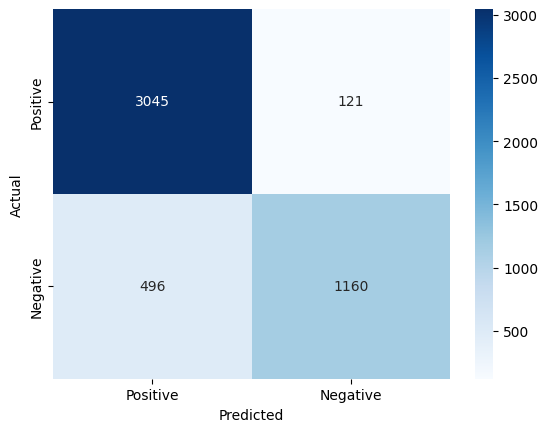

Evaluation completed!


In [ ]:
# Step 5: Evaluate Model Performance
print("Evaluating model performance...")
def evaluate_model(model, X_test_tfidf, y_test):
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label='positive')
    rec = recall_score(y_test, y_pred, pos_label='positive')
    cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])

    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print("Confusion Matrix:")

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Evaluation completed!")

evaluate_model(model, X_test_tfidf, y_test)